In [70]:
from keras.layers import Input, Lambda, Dense, Flatten
from keras.models import Model
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [71]:
IMAGE_SIZE = [224, 224]

In [72]:
train_path = r'D:\vgg16\code\Deep-Learning-Face-Recognition-master\dataset\Train'
valid_path = r'D:\vgg16\code\Deep-Learning-Face-Recognition-master\dataset\Validation'

In [73]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

In [74]:
for layer in vgg.layers:
  layer.trainable = False

In [75]:
folders = glob(r'D:\vgg16\code\Deep-Learning-Face-Recognition-master\dataset\Train/*')

In [76]:
folders

['D:\\vgg16\\code\\Deep-Learning-Face-Recognition-master\\dataset\\Train\\A',
 'D:\\vgg16\\code\\Deep-Learning-Face-Recognition-master\\dataset\\Train\\B',
 'D:\\vgg16\\code\\Deep-Learning-Face-Recognition-master\\dataset\\Train\\C',
 'D:\\vgg16\\code\\Deep-Learning-Face-Recognition-master\\dataset\\Train\\D']

In [9]:
import os

current_directory = os.getcwd()
print("Current working directory:", current_directory)

Current working directory: d:\vgg16\code\Deep-Learning-Face-Recognition-master


In [152]:
from keras.layers import Dropout

In [153]:
from keras.regularizers import l2  # Import L2 regularization

# Define your regularization strength (lambda)
l2_lambda = 0.02

In [154]:
x = Flatten()(vgg.output)
x = Dense(256, activation='relu',kernel_regularizer=l2(l2_lambda))(x)
x = Dropout(0.75)(x)
prediction = Dense(len(folders), activation='softmax', kernel_regularizer=l2(l2_lambda))(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()


Model: "model_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0  

In [162]:
from keras.optimizers import SGD
learning_rate = 0.0005

# Create an Adam optimizer with the specified learning rate
optimizer = SGD(learning_rate=learning_rate)

In [163]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=optimizer,
  metrics=['accuracy']
)


In [164]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                    shear_range = 0.2,
                                    zoom_range = 0.2,
                                    horizontal_flip = True,
                                    rotation_range=30,  
                                    width_shift_range=0.1,  
                                    height_shift_range=0.1 )

test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(r'D:\vgg16\code\Deep-Learning-Face-Recognition-master\dataset\Train',
                                                 target_size = (224, 224),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(r'D:\vgg16\code\Deep-Learning-Face-Recognition-master\dataset\Validation',
                                            target_size = (224, 224),
                                            batch_size = 8,
                                            class_mode = 'categorical')

Found 800 images belonging to 4 classes.
Found 400 images belonging to 4 classes.


In [165]:
r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Epoch 1/20
50/50 [==============================] - 14s 265ms/step - loss: 10.5874 - accuracy: 0.8662 - val_loss: 10.3734 - val_accuracy: 0.9900
Epoch 2/20
50/50 [==============================] - 13s 263ms/step - loss: 10.5135 - accuracy: 0.8737 - val_loss: 10.3781 - val_accuracy: 0.9375
Epoch 3/20
50/50 [==============================] - 14s 287ms/step - loss: 10.4548 - accuracy: 0.8913 - val_loss: 10.3328 - val_accuracy: 0.9675
Epoch 4/20
50/50 [==============================] - 14s 274ms/step - loss: 10.4111 - accuracy: 0.9162 - val_loss: 10.2410 - val_accuracy: 0.9850
Epoch 5/20
50/50 [==============================] - 14s 272ms/step - loss: 10.3785 - accuracy: 0.9225 - val_loss: 10.2152 - val_accuracy: 0.9875
Epoch 6/20
50/50 [==============================] - 14s 270ms/step - loss: 10.3407 - accuracy: 0.9137 - val_loss: 10.1915 - val_accuracy: 0.9950
Epoch 7/20
50/50 [==============================] - 13s 269ms/step - loss: 10.3181 - accuracy: 0.9337 - val_loss: 10.1665 - val_ac

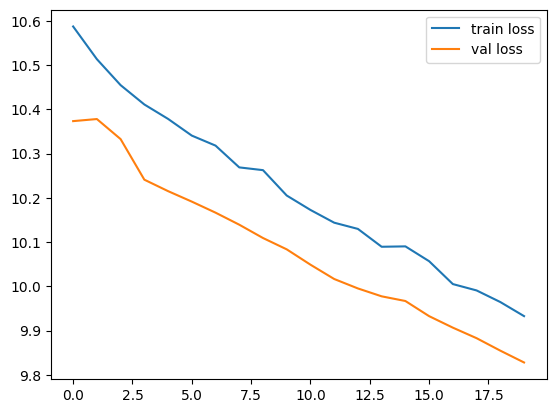

<Figure size 640x480 with 0 Axes>

In [166]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

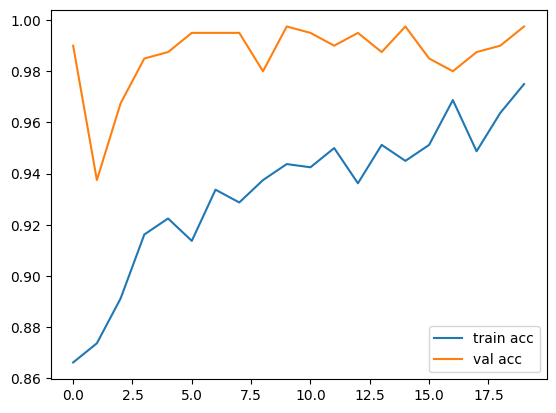

In [167]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
#plt.savefig('AccVal_acc')

In [68]:
import matplotlib.pyplot as plt
import pickle

# Assuming you have stored the training history as 'history'
# Save the history to a file
with open('training_history.pkl', 'wb') as file:
    pickle.dump(history.history, file)

# To load the history and plot it
with open('training_history.pkl', 'rb') as file:
    loaded_history = pickle.load(file)

plt.plot(loaded_history['loss'], label='train loss')
plt.plot(loaded_history['val_loss'], label='val loss')
plt.legend()
plt.show()


NameError: name 'history' is not defined

In [161]:
import tensorflow as tf

from keras.models import load_model

model.save('facefeatures_new_modelAddRegMoreDataSGDLowTR40MoreEpochsHigherLRn1+20.h5')